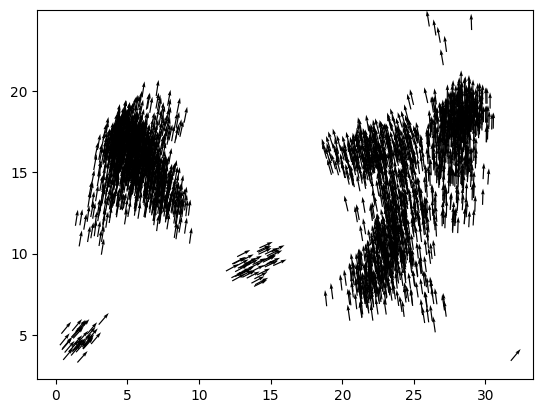

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
from itertools import product
import os
import matplotlib.animation as animation

current_directory = os.getcwd()


flag=0
     


while(flag==0):

    check=input("Single frame(s/S) or animation(a/A)")

    if(check=="A" or check=="a"):

        # Parameters
        
        noise=input("Noise : ")
        angle=input("Angle : ")
        trial=input("Trial : ")
        

        detail=[]
        with open(current_directory+f'/Angle_180/Noise_1/parameters.txt', 'r') as file:
            for line in file:
                detail.append(line)
        Length_of_box = float(detail[1])   # Size of the grid
        numberoftrial=int(detail[10])
        maxiter=int(detail[3])
        Number_of_agents=int(detail[0])
        Lx=int(detail[1])
        Ly=float(detail[2])
        v0=float(detail[4])
        dt=float(detail[5])
        density=float(detail[8])
        rc=float(detail[9])


        times=[]
        for i in range( maxiter):
            if(i<10):tf=1
            if(i>10):tf=10
            if(i>100):tf=50
            if(i>1000):tf=100
            if(i%tf==0):times.append(i)


        # Set up the figure and axis
        fig, ax = plt.subplots()
        ax.set_aspect('equal')
        quiver = ax.quiver(0, 0, 0, 0, angles='xy', scale_units='xy', scale=1)



        # Function to load data from files
        def load_data(path):
            data = []
            with open(path, 'r') as f:
                    for line in f:
                        data.append(float(line.strip()))
            return np.array(data)
        colour=['r','b','g','m']




        def update(t):
            global quiver
            quiver.remove()  # Remove the previous quiver 

            path_template_x = current_directory+f'/Angle_{angle}/Noise_{noise}/flockingdata/positionx_{trial}_{times[t]}_.dat'
            path_template_y = current_directory+f'/Angle_{angle}/Noise_{noise}/flockingdata/positiony_{trial}_{times[t]}_.dat'
            path_template_theta =current_directory+f'/Angle_{angle}/Noise_{noise}/flockingdata/theta_{trial}_{times[t]}_.dat'
            
            # Load position and angle data
            positionx = load_data(path_template_x)
            positiony = load_data(path_template_y)
            theta = load_data(path_template_theta)
            
            detail=load_data(current_directory+f'/Angle_{angle}/Noise_{noise}/parameters.txt')
            grid_size = detail[1]   # Size of the grid
            
            # Extract data for the specific time step
            px = positionx
            py = positiony
            th = theta
            # Compute velocity components
            vx = np.cos(th)
            vy = np.sin(th)
            
            # Plot the quiver plot
            ax.set_xlim(Lx)
            ax.set_ylim(Ly)
            ax.set_title("N="+str(Number_of_agents)+r"|$\eta=$"+str(noise)+r"|$\alpha=$"+str(angle)+r"|$t=$"+str(times[t]))
            quiver=ax.quiver(px, py, vx, vy,angles='xy', scale_units='xy', scale=1)
            
            return quiver




            

        # Create the animation
        ani = animation.FuncAnimation(fig, update, frames=len(times), blit=False)

        # Show the animation
        plt.show()
        flag=1


    elif(check=="s" or check=="S"):
        # Parameters
        
        noise=input("Noise : ")
        angle=input("Angle : ")
        time=input("Time : ")
        trial=input("Trial : ")
        detail=[]
        with open(current_directory+f'/Angle_{angle}/Noise_{noise}/parameters.txt', 'r') as file:
            for line in file:
                detail.append(line)
        Length_of_box = float(detail[1])   # Size of the grid
        numberoftrial=int(detail[10])
        maxiter=int(detail[3])
        Number_of_agents=int(detail[0])
        Lx=int(detail[1])
        Ly=float(detail[2])
        v0=float(detail[4])
        dt=float(detail[5])
        density=float(detail[8])
        rc=float(detail[9])



        # Function to load data from files
        def load_data(path):
            data = []
            with open(path, 'r') as f:
                    for line in f:
                        data.append(float(line.strip()))
            return np.array(data)
        colour=['r','b','g','m']




        path_template_x = current_directory+f'/Angle_{angle}/Noise_{noise}/flockingdata/positionx_{trial}_{time}_.dat'
        path_template_y = current_directory+f'/Angle_{angle}/Noise_{noise}/flockingdata/positiony_{trial}_{time}_.dat'
        path_template_theta =current_directory+f'/Angle_{angle}/Noise_{noise}/flockingdata/theta_{trial}_{time}_.dat'
        
        # Load position and angle data
        positionx = load_data(path_template_x)
        positiony = load_data(path_template_y)
        theta = load_data(path_template_theta)
        
        detail=load_data(current_directory+f'/Angle_{angle}/Noise_{noise}/parameters.txt')
        grid_size = detail[1]   # Size of the grid
        
        # Extract data for the specific time step
        px = positionx
        py = positiony
        th = theta
        # Compute velocity components
        vx = np.cos(th)
        vy = np.sin(th)
        
        # Plot the quiver plot

        plt.quiver(px, py, vx, vy,angles='xy', scale_units='xy', scale=1)
        
        
        # Show the animation
        plt.show()
        flag=1

    else:
        print("Wrong option Try again!!")
        


--- Cluster Analysis Results ---

Size of clusters:

Cluster 1: id:1  1739.0 agents   radius= 6.00209

Cluster 2: id:2  91.0 agents   radius= 1.90562

Cluster 3: id:3  38.0 agents   radius= 1.09444

Cluster 4: id:8  44.0 agents   radius= 1.31714

Cluster 5: id:14  25.0 agents   radius= 0.905782

Cluster 6: id:47  28.0 agents   radius= 0.923929

------------------------------



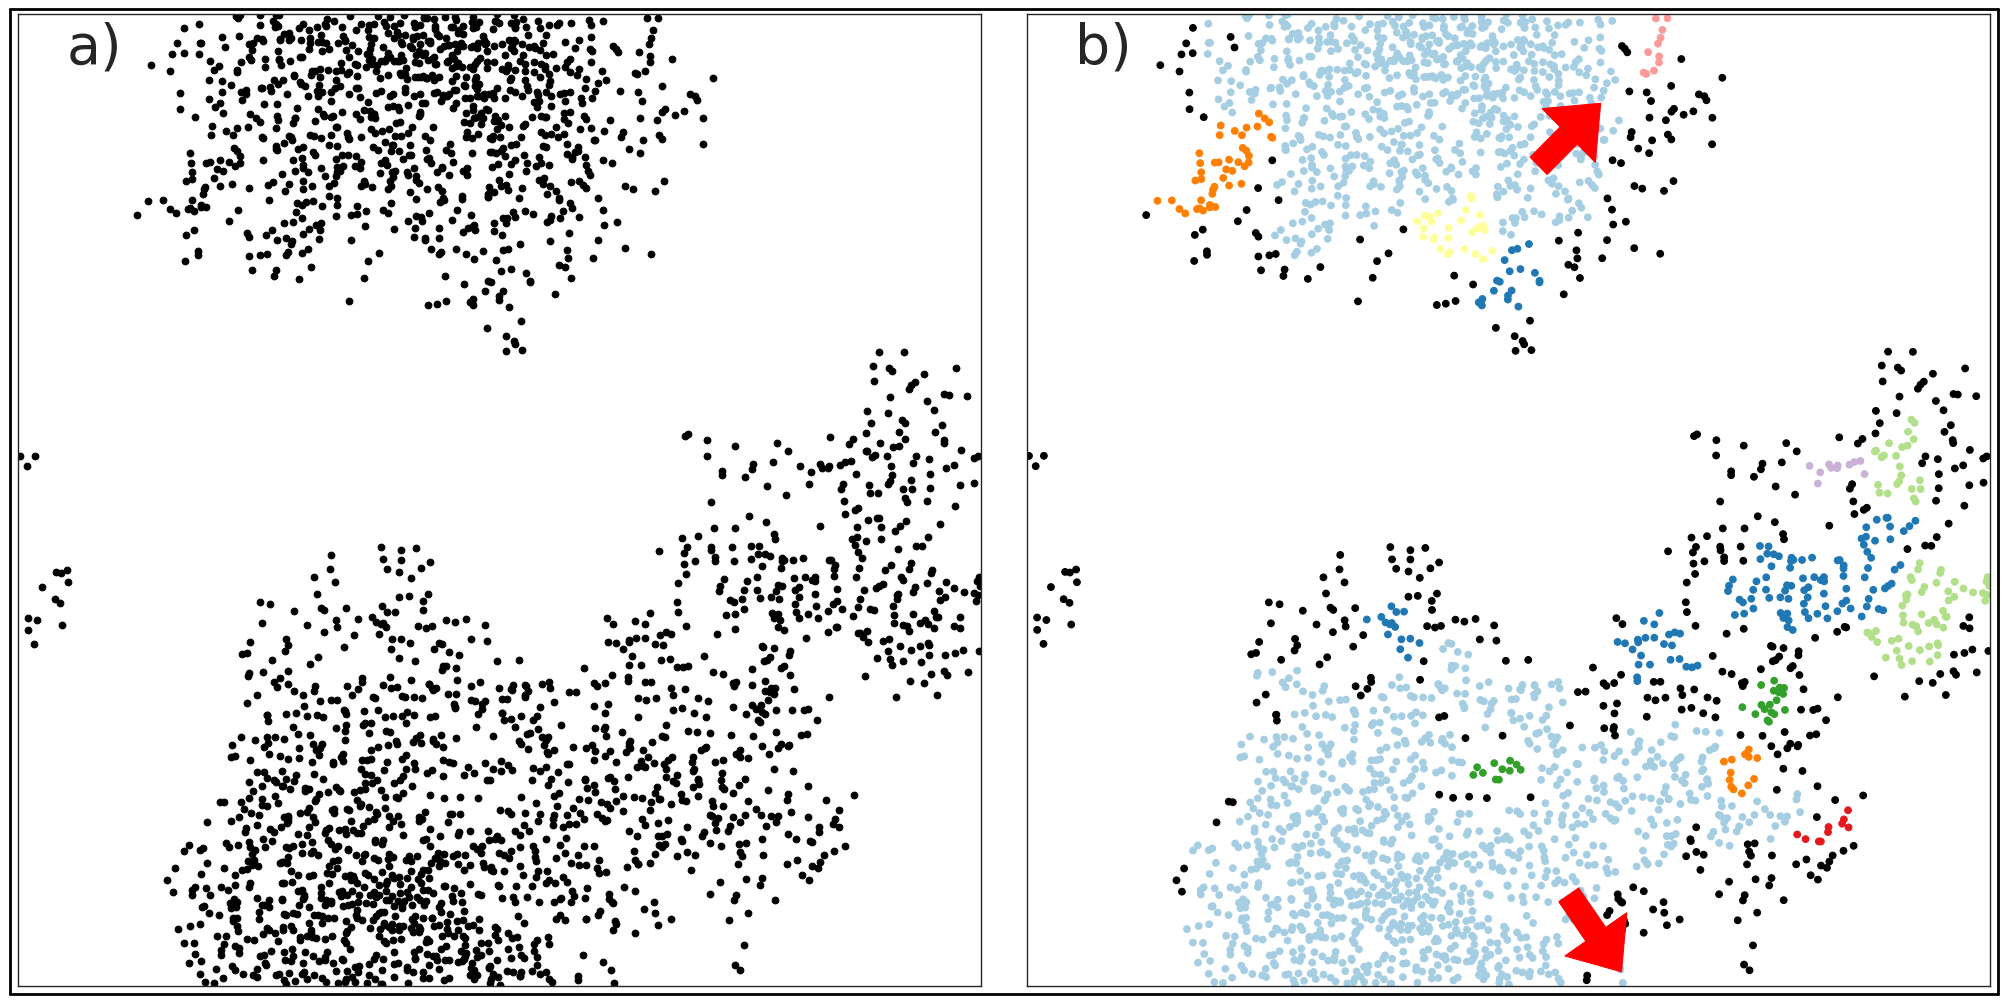

In [9]:

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import os

current_directory = os.getcwd()
plt.rcParams["font.family"] = "serif"
plt.rcParams['mathtext.fontset'] ="cm"
sns.set_theme(style="white")
sns.set_context("paper")

# Prepare the figure
fig, axes = plt.subplots(1,2, figsize=(20,10))
plt.rcParams["font.family"] = "serif"
plt.rcParams['mathtext.fontset'] ="cm"
sns.set_theme(style="white")
sns.set_context("paper")



# Function to load data from files
def load_data(path):
    """Loads numerical data from a file, one number per line."""
    data = []
    try:
        with open(path, 'r') as f:
            for line in f:
                data.append(float(line.strip()))
    except FileNotFoundError:
        return None
    except ValueError:
        return None
    return np.array(data)

Lx=32
Ly=32
N=2560
current_angle=180
current_angle_str=r"\pi/4"
current_noise=0.05
current_noise_str="0.05"
current_trial=0
current_time=5000
label=["a)","b)"]
# --- Load Data ---
path_template_x = os.path.join(current_directory, f'Angle_{current_angle}', f'Noise_{current_noise}', 'flockingdata', f'positionx_{current_trial}_{current_time}_.dat')
path_template_y = os.path.join(current_directory, f'Angle_{current_angle}', f'Noise_{current_noise}', 'flockingdata', f'positiony_{current_trial}_{current_time}_.dat')
path_template_theta = os.path.join(current_directory, f'Angle_{current_angle}', f'Noise_{current_noise}', 'flockingdata', f'theta_{current_trial}_{current_time}_.dat')
path_template_clusterindex = os.path.join(current_directory, f'Angle_{current_angle}', f'Noise_{current_noise}', 'cluster_index', f'clusterindex_{current_trial}_{current_time}_.txt')
path_template_radius = os.path.join(current_directory, f'Angle_{current_angle}', f'Noise_{current_noise}', 'cluster_index', f'radius_{current_trial}_{current_time}_.txt')
path_template_mass = os.path.join(current_directory, f'Angle_{current_angle}', f'Noise_{current_noise}', 'cluster_index', f'mass_{current_trial}_{current_time}_.txt')

positionx = load_data(path_template_x)
positiony = load_data(path_template_y)
theta = load_data(path_template_theta)
ci = load_data(path_template_clusterindex)
radius=load_data(path_template_radius)
mass=load_data(path_template_mass)

distinct_ci = list(set(ci))
cluster=[]

for i,c in enumerate(distinct_ci):
    current_cluster=[]
    for j,b in enumerate(ci):
        if(b==c):  
            current_cluster.append(j)
    cluster.append(current_cluster)  

# Ensure enough colors for distinct clusters, max(..., 1) handles case with no clusters
colourlist = sns.color_palette("Paired", max(len(distinct_ci), 1))

colour = list(range(N))
cl=list(range(N))
for i,clus in enumerate(cluster)  :
    if(len(clus)>=10):
        for j in clus:
            colour[j]=colourlist[i]
            cl[j]=i+1
    else:
        for j in clus:
            colour[j]="black"
            cl[j]=0        



print("--- Cluster Analysis Results ---\n")
print("Size of clusters:\n")
# Sort cluster keys for consistent output
n=1
for k,i in enumerate(mass):
    for j,clus in enumerate(cluster):
        if(len(clus)==i):
            print(f"Cluster {n}: id:{j+1}  {i} agents   radius= {radius[k]}\n")
            n+=1
        
print("------------------------------\n")


# Compute velocity components
# Check if theta has the same length as position data before computing vx, vy
if len(positionx) == len(theta) and len(positiony) == len(theta):
    vx = np.cos(theta)
    vy = np.sin(theta)

    # Plot the quiver plot
    # Check if color list has the same length as position data
    if len(positionx) == len(colour):
           axes[1].scatter(positionx, positiony,marker="o",color=colour)
            
    else:
            print("Warning: Number of position/theta data points does not match number of color points. Plotting without colors.")
            axes[1].plot(positionx, positiony) # Plot without colors
    axes[0].scatter(positionx, positiony,marker="o",color="black")
else:
    print("Error: Mismatch in the number of position and angle data points. Cannot plot vectors.\n")
    axes[1].clear() # Clear the plot


# Set plot title and labels
axes[0].set_xlabel("") # Added axis labels
axes[0].set_ylabel("")
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].set_xlim(0,Lx)
axes[0].set_ylim(0,Ly)


axes[1].set_xlabel("") # Added axis labels
axes[1].set_ylabel("")
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].set_xlim(0,Lx)
axes[1].set_ylim(0,Ly)

axes[0].annotate(label[0],size=40,xy=(0.05,0.95),xycoords="axes fraction")
axes[1].annotate(label[1],size=40,xy=(0.05,0.95),xycoords="axes fraction")

axes[1].arrow(
    18,         # x coordinate of the base
    3,         # y coordinate of the base
    0.9,              # length of the arrow along x
    -1.3,              # length of the arrow along y
    width=0.8,       # Thickness of the arrow body
    head_width=2.5,  # Width of the arrowhead
    head_length=1.5, # Length of the arrowhead
    fc='red',       # Fill color
    ec='red'    # Edge color
)
axes[1].arrow(
    17,         # x coordinate of the base
    27,         # y coordinate of the base
    1,              # length of the arrow along x
    1,              # length of the arrow along y
    width=0.8,       # Thickness of the arrow body
    head_width=2.5,  # Width of the arrowhead
    head_length=1.5, # Length of the arrowhead
    fc='red',       # Fill color
    ec='red'    # Edge color
)
line = plt.Line2D([0.003, 0.003], [0.006, 0.991], transform=fig.transFigure, color="black", linewidth=2)
fig.add_artist(line)

#vertical 5
line = plt.Line2D([0.997,0.997], [0.006, 0.991], transform=fig.transFigure, color="black", linewidth=2)
fig.add_artist(line)

#horizontal 4 (top=>bottom)
line = plt.Line2D([0.003, 0.997], [0.991, 0.991], transform=fig.transFigure, color="black", linewidth=2)
fig.add_artist(line)

#horizontal 1
line = plt.Line2D([0.003, 0.997], [0.006,0.006], transform=fig.transFigure, color="black", linewidth=2)
fig.add_artist(line)
plt.tight_layout()
plt.subplots_adjust(left=0.007,bottom=0.014,right=0.993,top=0.986,wspace=0.048,hspace=0.2)
plt.show()
